## 월평균 임금 및 임금상승률 (시도별)
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL15006&conn_path=I2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [2]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
pay = pd.read_csv("../../Data/companies/월평균_임금_및_임금상승률_시도__20230207145300.csv", encoding="euc-kr")
pay.head()

,행정구역별(1),2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,행정구역별(1),상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),...,상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),임금상승률 (%)
1,전국,2736921,4.5,2838343,3.7,2926186,3.1,3030286,3.6,3125273,...,3259281,4.3,3405769,4.5,3447287,1.2,3581564,3.9,3717328,3.8
2,서울특별시,3168798,5.4,3199814,1.0,3261561,1.9,3364470,3.2,3445867,...,3563940,3.4,3704202,3.9,3745761,1.1,3904436,4.2,4082853,4.6
3,부산광역시,2520222,2.7,2558970,1.5,2620611,2.4,2694140,2.8,2786616,...,2962069,6.3,3050186,3.0,3124238,2.4,3288414,5.3,3404468,3.5
4,대구광역시,2315945,2.3,2352273,1.6,2415995,2.7,2472297,2.3,2634209,...,2766527,5.0,2908433,5.1,2939627,1.1,3094138,5.3,3202101,3.5


> 시도별 > 년도 > 임금&상승률로 쌓아야한다.

##### 일단 시도별은 세로로 쌓여 있으니 년도를 쌓는다.

In [4]:
pay.columns

Index(['행정구역별(1)', '2013', '2013.1', '2014', '2014.1', '2015', '2015.1',
       '2016', '2016.1', '2017', '2017.1', '2018', '2018.1', '2019', '2019.1',
       '2020', '2020.1', '2021', '2021.1', '2022', '2022.1'],
      dtype='object')

- 년도는 2013 ~ 2022

In [5]:
# 시도
sido = pd.DataFrame(list(pay.iloc[2:, 0]))
sido

,0
0,서울특별시
1,부산광역시
2,대구광역시
3,인천광역시
4,광주광역시
5,대전광역시
6,울산광역시
7,세종특별자치시
8,경기도
9,강원도


In [6]:
# 년도
years = list(range(2014, 2023))

In [7]:
sido_copy = sido.copy()
sido_copy
sido_copy['년도'] = 2013
df = sido_copy

for year in years:
    sido_copy = sido.copy()
    sido_copy['년도'] = year
    df = pd.concat([df, sido_copy], axis=0)
    
df.reset_index(drop=True, inplace=True)
df

,0,년도
0,서울특별시,2013
1,부산광역시,2013
2,대구광역시,2013
3,인천광역시,2013
4,광주광역시,2013
...,...,...
165,전라북도,2022
166,전라남도,2022
167,경상북도,2022
168,경상남도,2022


In [8]:
pay.iloc[:,1:3]
pay.iloc[:,3:5]
# pay.iloc[:,19:21]
# len(pay.columns)

,2014,2014.1
0,상용 월평균 임금 (원),임금상승률 (%)
1,2838343,3.7
2,3199814,1.0
3,2558970,1.5
4,2352273,1.6
5,2637047,1.1
6,2493312,3.1
7,2805150,3.0
8,2952210,4.2
9,-,-


In [9]:
pay.columns = pay.iloc[0,:]
pay = pay.iloc[1:,:]
pay

,행정구역별(1),상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),...,상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),임금상승률 (%),상용 월평균 임금 (원),임금상승률 (%)
1,전국,2736921,4.5,2838343,3.7,2926186,3.1,3030286,3.6,3125273,...,3259281,4.3,3405769,4.5,3447287,1.2,3581564,3.9,3717328,3.8
2,서울특별시,3168798,5.4,3199814,1.0,3261561,1.9,3364470,3.2,3445867,...,3563940,3.4,3704202,3.9,3745761,1.1,3904436,4.2,4082853,4.6
3,부산광역시,2520222,2.7,2558970,1.5,2620611,2.4,2694140,2.8,2786616,...,2962069,6.3,3050186,3.0,3124238,2.4,3288414,5.3,3404468,3.5
4,대구광역시,2315945,2.3,2352273,1.6,2415995,2.7,2472297,2.3,2634209,...,2766527,5.0,2908433,5.1,2939627,1.1,3094138,5.3,3202101,3.5
5,인천광역시,2609457,4.0,2637047,1.1,2723424,3.3,2839944,4.3,2913439,...,3013149,3.4,3121843,3.6,3172498,1.6,3309353,4.3,3418862,3.3
6,광주광역시,2417477,4.2,2493312,3.1,2562254,2.8,2630845,2.7,2731776,...,2803147,2.6,2942622,5.0,2989188,1.6,3141221,5.1,3284566,4.6
7,대전광역시,2722674,3.0,2805150,3.0,2857131,1.9,2985356,4.5,3071837,...,3189820,3.8,3287005,3.0,3301865,0.5,3401031,3.0,3556267,4.6
8,울산광역시,2834007,-3.5,2952210,4.2,3084932,4.5,3122883,1.2,3169771,...,3279013,3.4,3377777,3.0,3438056,1.8,3515389,2.2,3725381,6.0
9,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,3423078,-,3530820,3.1,3685371,4.4
10,경기도,2735767,3.1,2784899,1.8,2853670,2.5,2970904,4.1,3102230,...,3236256,4.3,3384598,4.6,3467004,2.4,3611344,4.2,3751651,3.9


In [10]:
pay = pay.iloc[1:, :]

In [11]:
df2 = pay.iloc[:,1:3]
# df2 = pd.concat([df2, ])

for i in [3,5,7,9,11,13,15,17,19]:
    df2 = pd.concat([df2, pay.iloc[:, i:(i+2)]], axis=0)
df2

,상용 월평균 임금 (원),임금상승률 (%)
2,3168798,5.4
3,2520222,2.7
4,2315945,2.3
5,2609457,4.0
6,2417477,4.2
...,...,...
14,3192759,3.6
15,3445263,2.8
16,3563537,3.2
17,3560180,4.7


In [12]:
df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
pay_df = pd.concat([df, df2], axis=1)
pay_df.columns = ['시도', '년도', '상용_월평균_임금', '임금상승률']
pay_df

,시도,년도,상용_월평균_임금,임금상승률
0,서울특별시,2013,3168798,5.4
1,부산광역시,2013,2520222,2.7
2,대구광역시,2013,2315945,2.3
3,인천광역시,2013,2609457,4.0
4,광주광역시,2013,2417477,4.2
...,...,...,...,...
165,전라북도,2022,3192759,3.6
166,전라남도,2022,3445263,2.8
167,경상북도,2022,3563537,3.2
168,경상남도,2022,3560180,4.7


In [13]:
pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   시도         170 non-null    object
 1   년도         170 non-null    int64 
 2   상용_월평균_임금  170 non-null    object
 3   임금상승률      170 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.4+ KB


In [14]:
pay_df.replace("-", 0, inplace=True)
pay_df = pay_df.astype({'상용_월평균_임금':'float', '임금상승률':'float', '년도':'object'})

### 2013년 전국(시도) 상용 월평균 임금 막대 그래프

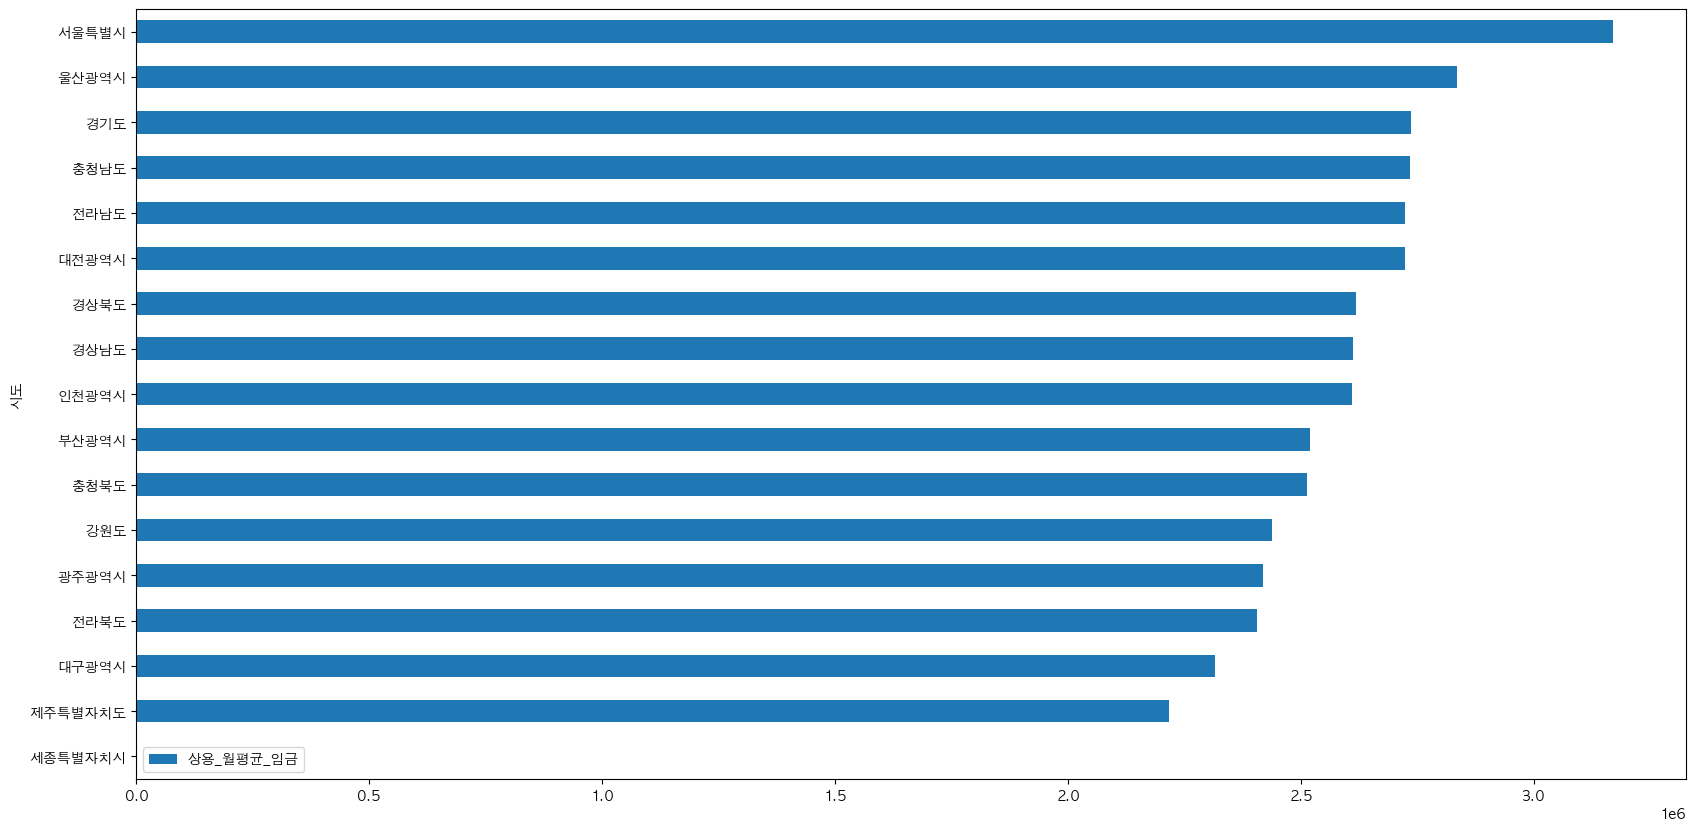

In [15]:
pay_df[pay_df['년도'] == 2013].sort_values(by='상용_월평균_임금').plot(
    x='시도',
    y='상용_월평균_임금',
    kind='barh', #barh: 옆으로 돌린 그래프
    figsize=(20,10),
)

plt.show()

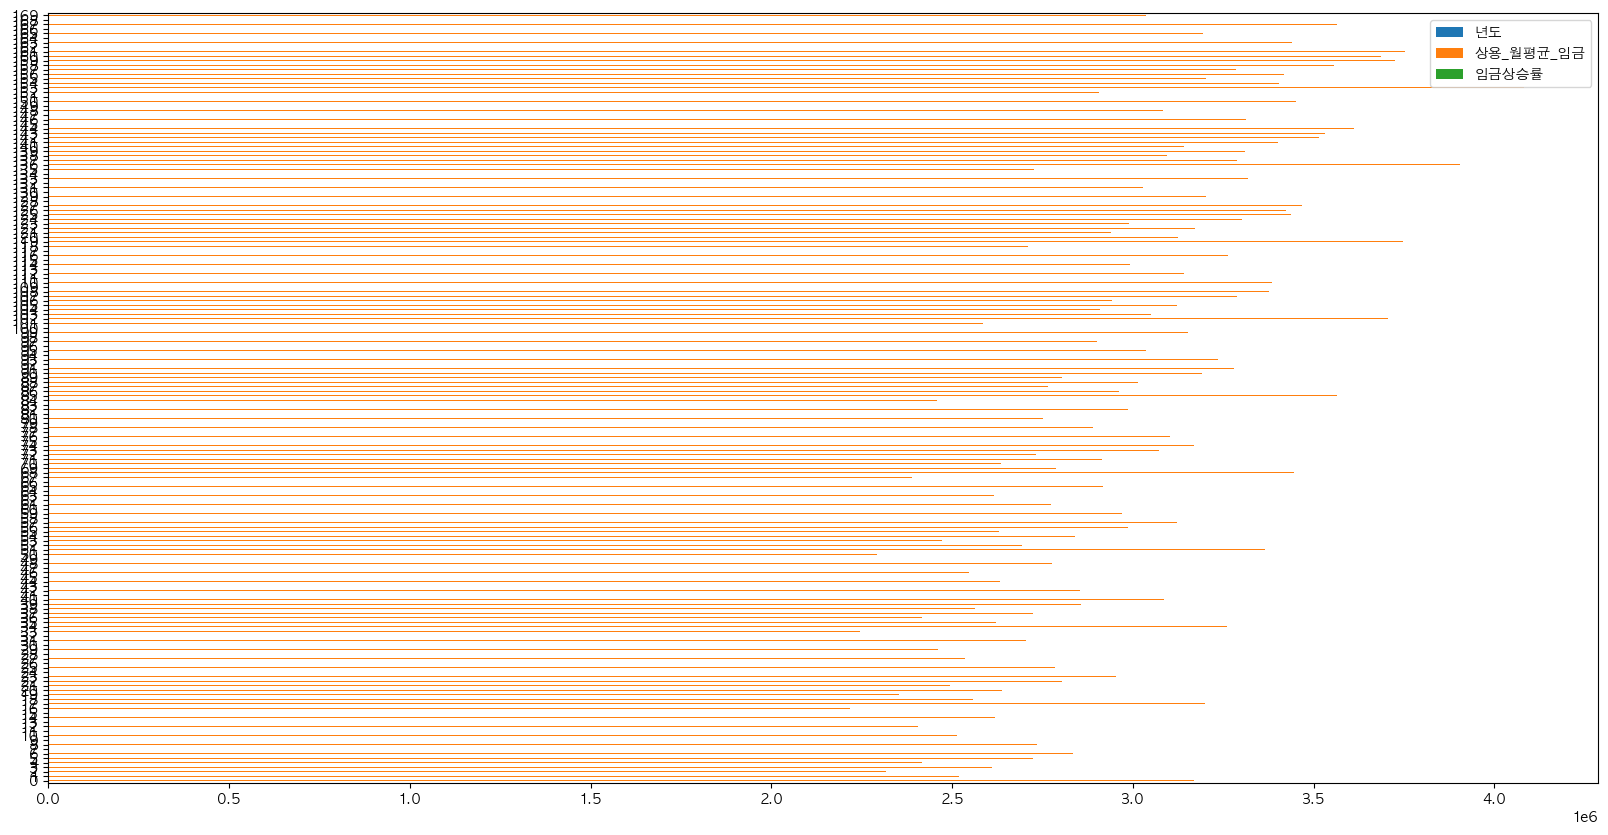

In [16]:
pay_df.plot(
    # x='시도',
    # y='상용_월평균_임금',
    kind='barh', #barh: 옆으로 돌린 그래프
    figsize=(20,10),
)

plt.show()

In [17]:
pay_df

,시도,년도,상용_월평균_임금,임금상승률
0,서울특별시,2013,3168798.0,5.4
1,부산광역시,2013,2520222.0,2.7
2,대구광역시,2013,2315945.0,2.3
3,인천광역시,2013,2609457.0,4.0
4,광주광역시,2013,2417477.0,4.2
...,...,...,...,...
165,전라북도,2022,3192759.0,3.6
166,전라남도,2022,3445263.0,2.8
167,경상북도,2022,3563537.0,3.2
168,경상남도,2022,3560180.0,4.7


<Figure size 2000x500 with 0 Axes>

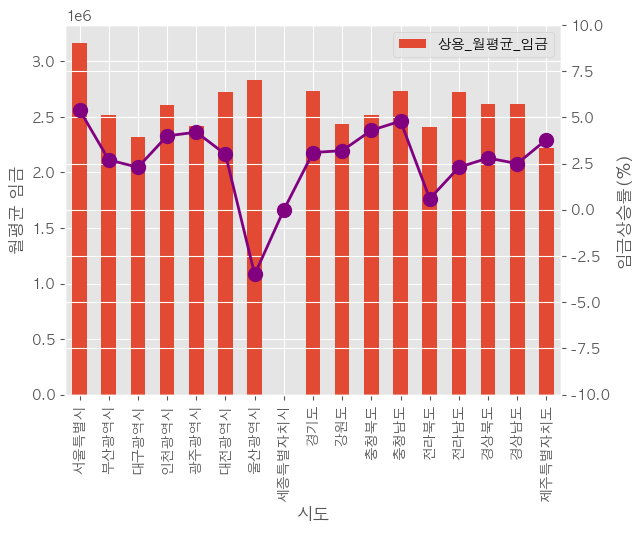

In [18]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,5))
# ax = fig.add_subplot(1,1,1) #하나짜리 그래프

ax = pay_df[pay_df['년도'] == 2013].plot(
    x='시도',
    y='상용_월평균_임금',
    kind='bar', #barh: 옆으로 돌린 그래프
)

ax2 = ax.twinx()
ax2.plot(
    pay_df[pay_df['년도'] == 2013]['시도'],
    pay_df[pay_df['년도'] == 2013]['임금상승률'],
    marker = 'o',
    markerfacecolor = 'purple',
    markersize = 10,
    color = 'purple',
    linewidth = 2,
    label = '서울->강원'
)

ax2.set_ylim(-10,10)

ax.set_xlabel('시도')
ax.set_ylabel('월평균 임금')
ax2.set_ylabel('임금상승률(%)')
ax.legend(loc="best", fontsize=10)

plt.show()

In [20]:
# pay_df.to_csv("../../Data/companies/정제_월평균임금_임금상승률(2013~2022).csv", encoding='utf-8', index=False)